In [19]:
import scripts.helpers as helpers
import importlib
importlib.reload(helpers)
helpers.add_backend_to_path()

In [20]:
import os
import json
import pandas as pd
from typing import List, Dict
from app.courses import CourseClient

courseClient = CourseClient(os.path.join("..","web", "backend", "assets", "courses"))
df = courseClient.df

print(len(df))
print(df.head(10))

21106
                  CODE FACULTY  \
CODE                             
A_SPT            A_SPT     CST   
AUT_TM1        AUT_TM1     CST   
BELONG          BELONG     CST   
CJV_AJ_ESL  CJV_AJ_ESL     CST   
CJV_A_KPed  CJV_A_KPed     CST   
CJV_A_REC    CJV_A_REC     CST   
CJV_A_RMU    CJV_A_RMU     CST   
CJV_A_ZZS    CJV_A_ZZS     CST   
CJV_CEFR      CJV_CEFR     CST   
CJV_CTV        CJV_CTV     CST   

                                                      NAME_EN    LANGUAGE  \
CODE                                                                        
A_SPT          English for court translators and interpreters     čeština   
AUT_TM1     Introduction to scheduling and time management...     čeština   
BELONG      Professional Writing and Communication with Em...  angličtina   
CJV_AJ_ESL                     English Speaking and Listening  angličtina   
CJV_A_KPed                 English for Department of Pedagogy     čeština   
CJV_A_REC                           English fo

In [21]:
# Create a new column with the character count
df['DESCRIPTION_CHAR_COUNT'] = df['DESCRIPTION'].apply(
    lambda x: len(str(x)) if pd.notna(x) else 0
)
total_char_count = df['DESCRIPTION_CHAR_COUNT'].sum()
print(f"Total character count across all descriptions: {total_char_count:,}")

Total character count across all descriptions: 6,610,718


Number of rows with at least one empty attribute: 21106


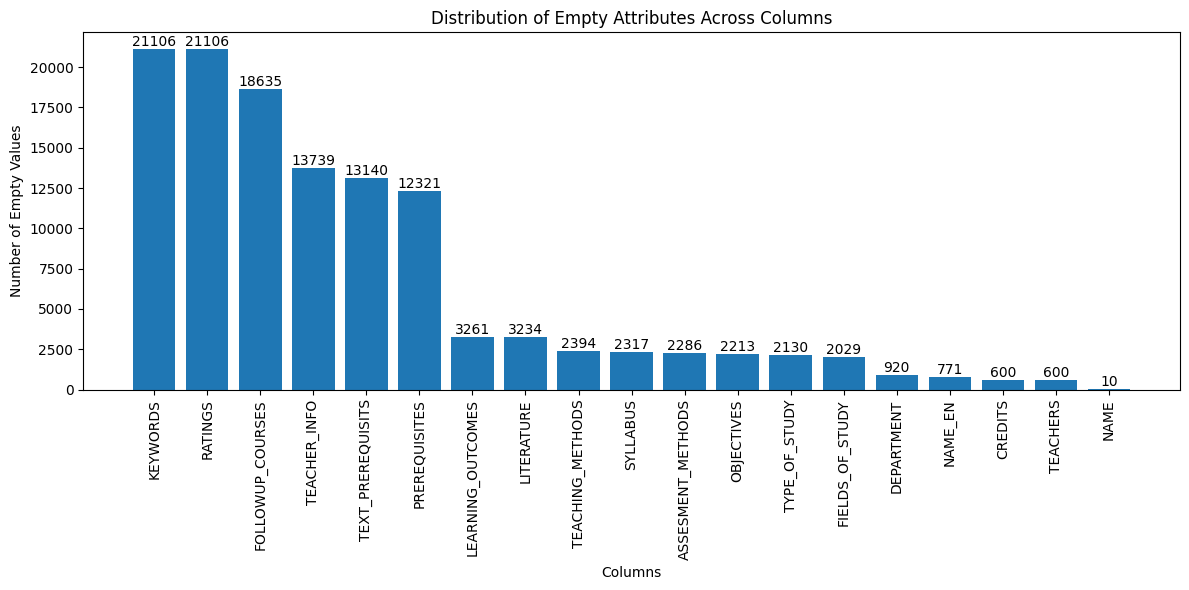


Top columns with the most empty values:
KEYWORDS            :  21106 empty values (100.00% of total)
RATINGS             :  21106 empty values (100.00% of total)
FOLLOWUP_COURSES    :  18635 empty values (88.29% of total)
TEACHER_INFO        :  13739 empty values (65.10% of total)
TEXT_PREREQUISITS   :  13140 empty values (62.26% of total)
PREREQUISITES       :  12321 empty values (58.38% of total)
LEARNING_OUTCOMES   :   3261 empty values (15.45% of total)
LITERATURE          :   3234 empty values (15.32% of total)
TEACHING_METHODS    :   2394 empty values (11.34% of total)
SYLLABUS            :   2317 empty values (10.98% of total)
ASSESMENT_METHODS   :   2286 empty values (10.83% of total)
OBJECTIVES          :   2213 empty values (10.49% of total)
TYPE_OF_STUDY       :   2130 empty values (10.09% of total)
FIELDS_OF_STUDY     :   2029 empty values (9.61% of total)
DEPARTMENT          :    920 empty values (4.36% of total)
NAME_EN             :    771 empty values (3.65% of total)


In [22]:
empty_rows = df[df.isna().any(axis=1) | df.map(lambda x: x == '' if isinstance(x, str) else False).any(axis=1)]
print(f"Number of rows with at least one empty attribute: {len(empty_rows)}")

# Count empty values for each column
empty_counts = {}
for column in df.columns:
    nan_count = df[column].isna().sum()

    empty_string_count = 0
    if df[column].dtype == 'object':
        empty_string_count = (df[column] == '').sum()

    empty_counts[column] = nan_count + empty_string_count

import matplotlib.pyplot as plt

# Filter out columns with zero empty values
non_zero_empty_counts = {k: v for k, v in empty_counts.items() if v > 0}

# Sort the filtered dictionary by values in descending order
sorted_items = sorted(non_zero_empty_counts.items(), key=lambda x: x[1], reverse=True)
sorted_columns = [item[0] for item in sorted_items]
sorted_values = [item[1] for item in sorted_items]

plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_columns, sorted_values)
plt.xticks(rotation=90)
plt.title('Distribution of Empty Attributes Across Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Empty Values')

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Display the top columns with the most empty values
sorted_empty_counts = sorted(empty_counts.items(), key=lambda x: x[1], reverse=True)
print("\nTop columns with the most empty values:")
for column, count in sorted_empty_counts:
    if count > 0:
        print(f"{column:20}: {count:6} empty values ({count/len(df)*100:.2f}% of total)")

Number of rows with empty name: 10


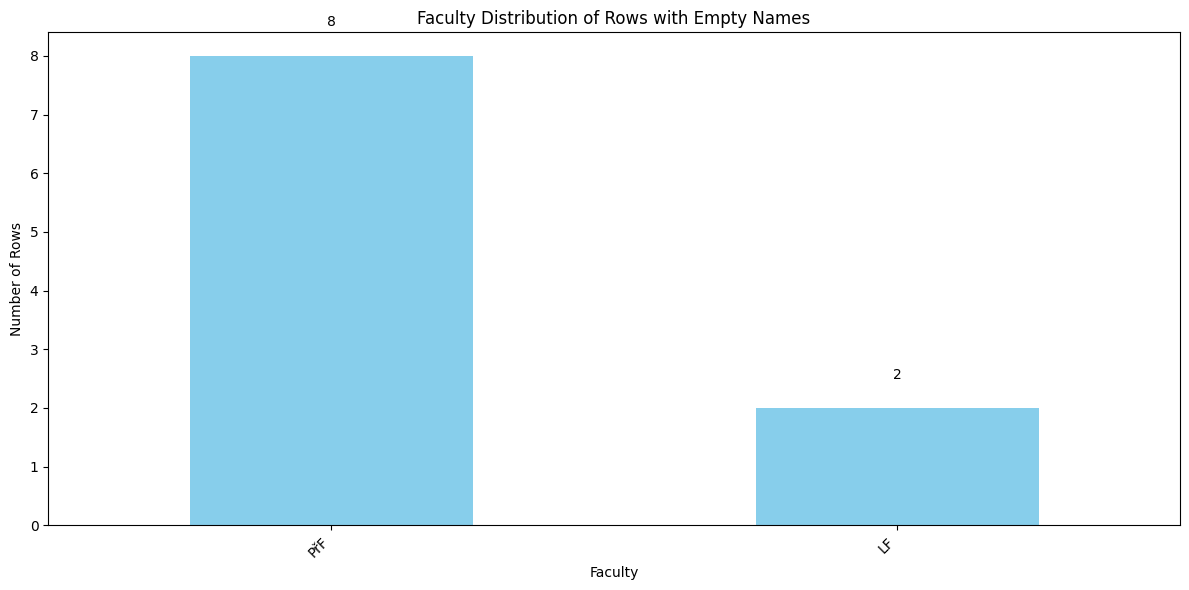


Faculty distribution of rows with empty names:
PřF                           :    8 rows (80.00% of empty name rows)
LF                            :    2 rows (20.00% of empty name rows)
Empty rows from FI: 10


,CODE,NAME,NAME_EN,FACULTY,CREDITS,COMPLETION
CODE,,,,,,
CZV_REPA,CZV_REPA,,,LF,,z
SIMU_VERA,SIMU_VERA,,,LF,,z
MRFA0411c _20523,MRFA0411c _20523,,,PřF,0,z
MRFA0411p _20524,MRFA0411p _20524,,,PřF,1,zk
MRFY0311c _20525,MRFY0311c _20525,,,PřF,1,z
MRFY0311p _20526,MRFY0311p _20526,,,PřF,3,zk
MRHE0411p _20527,MRHE0411p _20527,,,PřF,1,z
MRPA0221p _20529,MRPA0221p _20529,,,PřF,2,zk
MRPA0322p _20530,MRPA0322p _20530,,,PřF,2,zk


In [23]:
# Print rows with empty name
empty_name_rows = df[df['NAME'].isna() | (df['NAME'] == '')]
print(f"Number of rows with empty name: {len(empty_name_rows)}")

# Count occurrences of each faculty
faculty_counts = empty_name_rows['FACULTY'].value_counts()

# Create a bar chart to visualize the distribution
plt.figure(figsize=(12, 6))
ax = faculty_counts.plot(kind='bar', color='skyblue')
plt.title('Faculty Distribution of Rows with Empty Names')
plt.xlabel('Faculty')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45, ha='right')

# Add count labels on top of each bar
for i, v in enumerate(faculty_counts):
    ax.text(i, v + 0.5, str(v), ha='center')

plt.tight_layout()
plt.show()

# Print percentage distribution
print("\nFaculty distribution of rows with empty names:")
for faculty, count in faculty_counts.items():
    print(f"{faculty:30}: {count:4} rows ({count/len(empty_name_rows)*100:.2f}% of empty name rows)")


# Print rows from given faculty that have empty name
print(f"Empty rows from FI: {len(empty_name_rows)}")
display(empty_name_rows[['CODE', "NAME", "NAME_EN", 'FACULTY', 'CREDITS', 'COMPLETION']])


Number of courses with 'thesis' in the name: 1833

Sample thesis courses:


,CODE,NAME,FACULTY
CODE,,,
DKKP_P_K2,DKKP_P_K2,Doktorandský seminář 2 (pramenné studium),FF
AJLA29801,AJLA29801,Seminář k magisterské diplomové práci II,FF
Bi7700,Bi7700,Diplomová práce z Buněčné biologie 4,PřF
AJ19999,AJ19999,Státní závěrečná zkouška bakalářská,FF
BKH_TEBP,BKH_TEBP,Teze bakalářské práce,ESF
NJ_ZP,NJ_ZP,Závěrečná práce,PdF
AR1A351,AR1A351,Bakalářská diplomová práce,FF
PS_BA033,PS_BA033,Státní závěrečná zkouška bakalářská,FF
KSCA699,KSCA699,Seminář k magisterské diplomové práci II,FF


,CODE,NAME,NAME_EN
CODE,,,
BKF_BAS1,BKF_BAS1,Bakalářský seminář 1,Bachelor Thesis Seminar 1
BKF_BAS2,BKF_BAS2,Bakalářský seminář 2,Bachelor Thesis Seminar 2
BKF_SZP1,BKF_SZP1,Seminář k závěrečné práci 1,Final Thesis Seminar 1
BKF_SZP2,BKF_SZP2,Seminář k závěrečné práci 2,Final Thesis Seminar 2
BKF_TEZP,BKF_TEZP,Teze závěrečné práce,Thesis
...,...,...,...
MPV_DIS1,MPV_DIS1,Diplomový seminář 1,Diploma Thesis Seminar 1
MPV_DIS2,MPV_DIS2,Diplomový seminář 2,Diploma Thesis Seminar 2
MPV_MDS1,MPV_MDS1,Diplomový seminář MFTAP 1,MFTAP Diploma Thesis Seminar 1


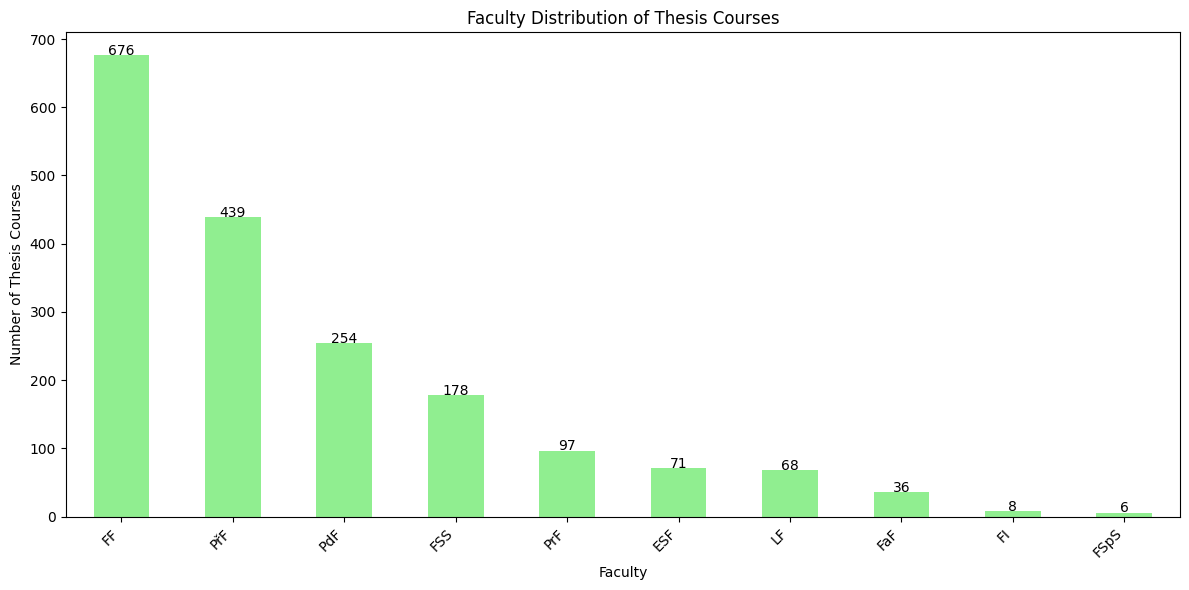


Faculty distribution of thesis courses:
FF                            :  676 courses (36.88% of thesis courses)
PřF                           :  439 courses (23.95% of thesis courses)
PdF                           :  254 courses (13.86% of thesis courses)
FSS                           :  178 courses (9.71% of thesis courses)
PrF                           :   97 courses (5.29% of thesis courses)
ESF                           :   71 courses (3.87% of thesis courses)
LF                            :   68 courses (3.71% of thesis courses)
FaF                           :   36 courses (1.96% of thesis courses)
FI                            :    8 courses (0.44% of thesis courses)
FSpS                          :    6 courses (0.33% of thesis courses)


In [ ]:
# Count courses with "thesis" in the NAME field (case insensitive)
thesis_courses = df[df['NAME'].str.contains('thesis', case=False, na=False) \
                    | df['NAME'].str.contains('diplomov', case=False, na=False) \
                    | df['NAME'].str.contains('bakalářsk', case=False, na=False) \
                    | df['NAME'].str.contains('státnic', case=False, na=False) \
                    | df['NAME_EN'].str.contains('thesis', case=False, na=False) \
                    | df['NAME_EN'].str.contains('state exam', case=False, na=False) \
                    ]
print(f"Number of courses with 'thesis' in the name: {len(thesis_courses)}")

print("\nSample thesis courses:")
display(thesis_courses[['CODE', 'NAME', 'FACULTY']].sample(10))

# Count occurrences of each faculty for thesis courses
thesis_faculty_counts = thesis_courses['FACULTY'].value_counts()

# Create a bar chart to visualize the distribution by faculty
plt.figure(figsize=(12, 6))
ax = thesis_faculty_counts.plot(kind='bar', color='lightgreen')
plt.title('Faculty Distribution of Thesis Courses')
plt.xlabel('Faculty')
plt.ylabel('Number of Thesis Courses')
plt.xticks(rotation=45, ha='right')

# Add count labels on top of each bar
for i, v in enumerate(thesis_faculty_counts):
    ax.text(i, v + 0.5, str(v), ha='center')

plt.tight_layout()
plt.show()

# Print percentage distribution
print("\nFaculty distribution of thesis courses:")
for faculty, count in thesis_faculty_counts.items():
    print(f"{faculty:30}: {count:4} courses ({count/len(thesis_courses)*100:.2f}% of thesis courses)")

